# Лабораторная работа №2
# Вариант №3
## В работе численно решается уравнение Релея, переписанное ввиде системы ОДУ
$$
\left\{\begin{gathered}x1'=x2\\x2'=1000\,\left(1-x2^{2}\right)\,x2-x1\\x1(0)=0\\ x2(0)=0.001\end{gathered}\right.
$$

## Был использован неявный метод Рунге-Кутты 2 порядка точности.



In [1]:
import numpy as np
from matplotlib import pyplot as plt

h = 1e-3
initial_condition = np.array([[0], [0.001]])

def Riley(t, x):
    x1 = x[0][0]
    x2 = x[1][0]
    x1_new = x2
    x2_new = 1000 * (1 - x2 ** 2) * x2 - x1
    return np.array([[x1_new], [x2_new]])

# 2-rd order
def Runge_Kutta(t, x, h, f):
    xn1_ = x + h * f(t, x)
    return x + h / 2 * (f(t, x) + f(t + h, xn1_))

In [2]:
def draw_result(t, xs, ys):
    fig, ax = plt.subplots(figsize=[30, 8])
    plt.subplot(121)
    plt.plot(t, xs,  linewidth=2, label='X')
    plt.plot(t, ys, linewidth=2, label='Y')
    plt.title('Riley', fontsize=24)
    plt.xlabel('Time, с', fontsize=20)
    plt.ylabel('Concentration', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(which='major', linestyle='-')
    plt.legend()
    plt.subplot(122)
    plt.plot(xs, ys, color='red')
    plt.title('Phase tragectory', fontsize=24)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(which='major', linestyle='-')
    plt.grid(which='minor', linestyle='--', linewidth=0.1)
    plt.show()

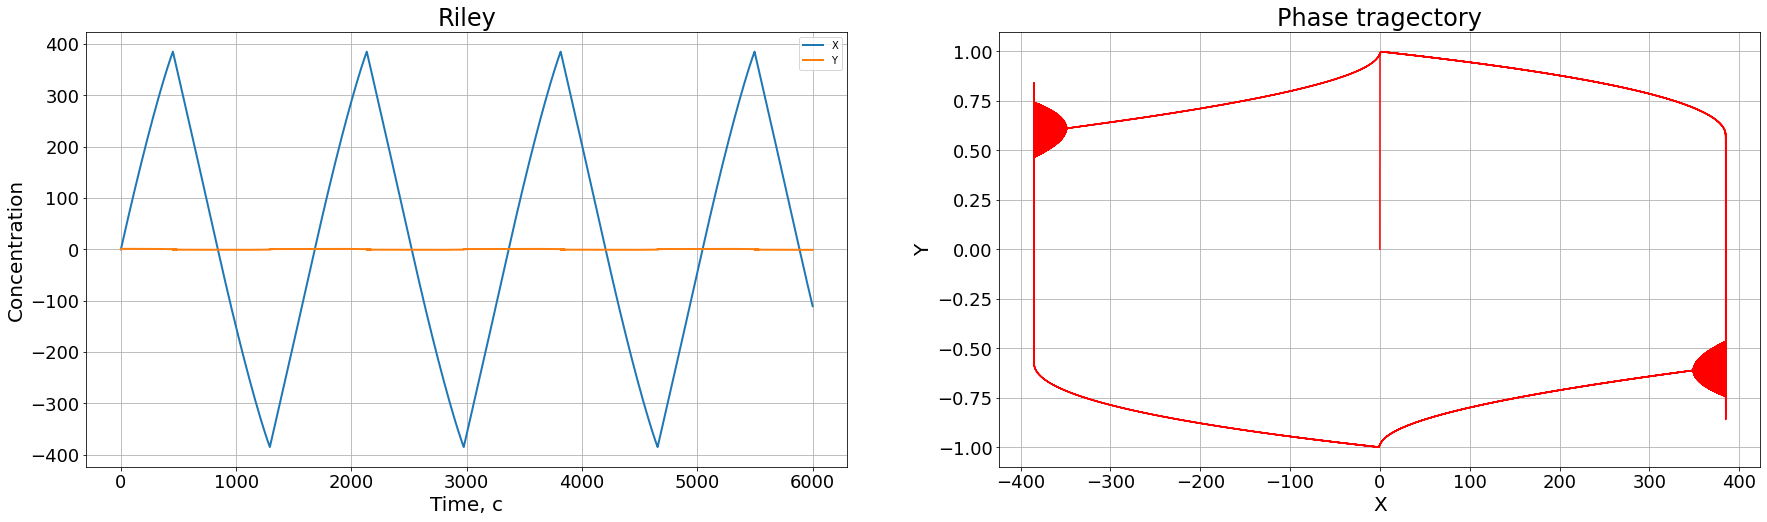

In [4]:
t = [0.0]
solution = [initial_condition]

for i in range(6000000):
    iteration = Runge_Kutta(t[i], solution[i], h, Riley)
    solution.append(iteration)
    t.append(h * (i + 1))

x1 = []
x2 = []
for point in solution:
    x1.append(point[0][0])
    x2.append(point[1][0])

draw_result(t, x1, x2)

## Видно, что решение периодическое